# Function sobel

## Synopse

Sobel edge detection.

- **mag,theta = sobel(f)**
    - **mag,theta:** Magnitude and angle.
    - **f:** Image. input image

In [1]:
import numpy as np

def sobel(f):
    from pconv import pconv
    
    Sx = np.array([[1.,2.,1.],
                   [0.,0.,0.],
                   [-1.,-2.,-1.]])
    Sy = np.array([[1.,0.,-1.],
                   [2.,0.,-2.],
                   [1.,0.,-1.]])
    
    fx = pconv(f, Sx)
    fy = pconv(f, Sy)
    
    mag = np.abs(fx + fy*1j)
    theta = np.arctan2(fy,fx)
    
    return mag,theta

## Description

Computes the edge detection by Sobel. Compute magnitude and angle.

## Examples

In [1]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python sobel.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    
    import matplotlib.image as mpimg

[NbConvertApp] Converting notebook sobel.ipynb to python
[NbConvertApp] Writing 2632 bytes to sobel.py


### Numerical Example

In [2]:
if testing:
    f = np.array([[0,1,0,0],
                  [0,0,0,0],
                  [0,0,0,0]],dtype='uint8')
    m,t = ia.sobel(f)
    print('m:\n',m)
    print('t:\n',t)

m:
 [[ 0.          1.41421356  2.          1.41421356]
 [ 0.          2.          0.          2.        ]
 [ 0.          1.41421356  2.          1.41421356]]
t:
 [[ 0.          0.78539816  0.         -0.78539816]
 [ 0.          1.57079633  0.         -1.57079633]
 [ 0.          2.35619449  3.14159265 -2.35619449]]


### Image examples

### Example 1.

""
Sobel
""
Log of sobel

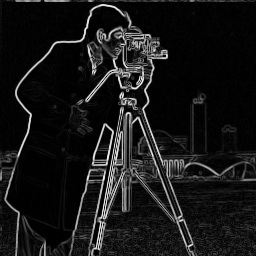
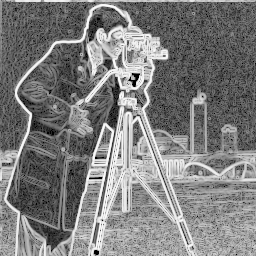

In [3]:
if testing:
    f = mpimg.imread('../data/cameraman.tif')
    
    (g,a) = ia.sobel(f)
    
    nb = ia.nbshow(2)
    nb.nbshow(ia.normalize(g),title='Sobel')
    nb.nbshow(ia.normalize(np.log(g+1)),title='Log of sobel')
    nb.nbshow()

### Example 2.

""
Image f
""
Magnitude of Sobel filtering
""
Angle of edges with magnitude above 2

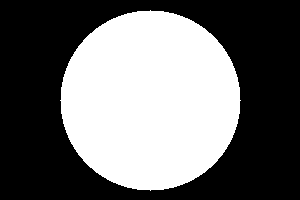
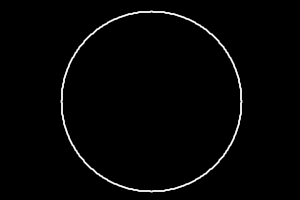
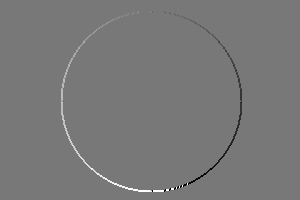

In [4]:
if testing:
    f = ia.circle([200,300], 90, [100,150])
    m,t = ia.sobel(f)
    
    dt = np.select([m > 2], [t])
    
    nb = ia.nbshow(3)
    nb.nbshow(f,title='Image f')
    nb.nbshow(ia.normalize(m), title='Magnitude of Sobel filtering')    
    nb.nbshow(ia.normalize(dt), title='Angle of edges with magnitude above 2')
    nb.nbshow()

## Equation

$$
f_{sobel} = \sqrt{f^2_{x}+f^2_{y}}
$$

$$
f_{theta} = arctan(\frac{f_{y}}{f_{x}})
$$

$$
f_{x} = (f_{(N,M)}*S_{x})
$$

$$
f_{y} = (f_{(N,M)}*S_{y})
$$

$$
S_{x} = \begin{bmatrix} 1 & 2 & 1 \\
                        0 & 0 & 0 \\
                        -1 & -2 & -1 \\
                        \end{bmatrix}
$$

$$
S_{y} = \begin{bmatrix} 1 & 0 & -1 \\
                        2 & 0 & -2 \\
                        1 & 0 & -1 \\
                        \end{bmatrix}
$$

## Reference

- [Function iasobel](http://adessowiki.fee.unicamp.br/adesso-1/wiki/ia636/iasobel/view/)

## Contributions

- Tiago Dezotti, 1. sem 2017.